In [1438]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

##Set PATH
path='C:/Users/JonathanBrian/Desktop/IVS/Logger/loggerfile310317/'
filne = 'loggerFile_tablet2.txt'

##init of variables

NewSession=[]
sub_str=[]
SessionCount=0
KinectON=[]
KinectOFF=[] 
LightONCount=0 #Counter for how many times light switched on
LightOFFCount=0 #Counter for how many times light switched off

##Begin
#myList=open(filne).readlines()
with open(path+filne, 'r') as f: #Open file in read mode
     print('Displaying: ', filne)
     for num, line in enumerate(f, 1): #num is the line/index number of the text file, line is the increment index
        sub_str.append(line.split())
        if 'NewSESSION' in line.split():
            NewSession.append(line.split()) #fill NewSession list with all new sessions  

Displaying:  loggerFile_tablet2.txt


In [1439]:
ListofLists=[[] for x in range(len(NewSession))]#create a list of list with elements
                                                 #as many New sessions
CoordListofLists=[[] for x in range(len(NewSession))]
PositionChange=[[] for x in range(len(NewSession))]
IntensityChange=[[] for x in range(len(NewSession))]
LightON=[[] for x in range(len(NewSession))]
LightOFF=[[] for x in range(len(NewSession))]
#print(CoordListofLists)
for idx,sessions in enumerate(NewSession,0):
    ListofLists[idx]=[sessions]

In [1440]:
if filne.find('Kinect') !=-1:
    for idx, strline in enumerate(sub_str,0):
        if 'NewSESSION' in strline:
            SessionCount=SessionCount+1
            print('')
            print('New session started:          ', ' '.join(strline[1:]))
            LightON.append([])
        if 'kinectTrackON' in strline:
            KinectON.append(strline)
            ListofLists[SessionCount-1].append(strline)
            print('Kinect tracker turned ON at:  ', ' '.join(strline[1:]))
        if 'kinectTrackOFF' in strline:
            KinectOFF.append(strline)
            ListofLists[SessionCount-1].append(strline)
            print('Kinect tracker turned OFF at: ', ' '.join(strline[1:]))
        if 'lightsON' in strline:
            LightON[SessionCount-1].append(strline)
            ListofLists[SessionCount-1].append(strline)
            print('Lights turned ON at:          ', ' '.join(strline[1:]))
            LightONCount=LightONCount+1
        if 'lightsOFF' in strline:
            LightOFF.append(strline)
            ListofLists[SessionCount-1].append(strline)
            print('Lights turned OFF at:         ', ' '.join(strline[1:]))
            LightOFFCount=LightOFFCount+1
        if 'kinectTrack' in strline:
            coords = [ float(strline[1]),float(strline[2]) ]
            CoordListofLists[SessionCount-1].append(coords)
            #print('coord: ', SessionCount-1)
        else:
            pass
    LightON = [x for x in LightON if x] #removes all empty lists
    

In [1441]:
if filne.find('Kinect') !=-1:
    print('')
    print('Number of new sessions:                ', len(NewSession))
    print('Times Kinect tracker was switched ON:  ', len(KinectON))
    print('Times Kinect tracker was switched OFF: ', len(KinectOFF))
    print('Times Light was switched ON:           ', LightONCount)
    print('Times Light was switched OFF:          ', LightOFFCount)

In [1442]:
if filne.find('Kinect') !=-1:
    for i in range(len(NewSession)):
        print('')
        print('Movement for session started', ' '.join(NewSession[i][1:]))
        plt.plot(*zip(*CoordListofLists[i]), marker='o', color='b', ls='-')
        plt.show() 

In [1443]:
if filne.find('tablet') !=-1:
    for idx, strline in enumerate(sub_str,0):
        if 'NewSESSION' in strline:
            SessionCount=SessionCount+1
            print('')
            print('New session started:          ', ' '.join(strline[1:]))      
        if 'positionChanged' in strline:
            PoistionChange[SessionCount-1].append(strline)
            #print('Position changed at:           ', ' '.join(strline[1:]))

        if 'intensityChanged' in strline:
            IntensityChange[SessionCount-1].append(strline)
            #print('Intensity changed at:        ', ' '.join(strline[1:]))

        if 'light' and 'ON' in strline:
            LightON.append(strline)
            print(strline[0], 'was turned', strline[1], 'at', strline[5])

        if 'light' and 'OFF' in strline:
            LightOFF.append(strline)
            print(strline[0], 'was turned', strline[1], 'at', strline[5])

        if 'pos:' in strline:
            coords = [ float(strline[1]),float(strline[2]) ]
            CoordListofLists[SessionCount-1].append(coords)
    IntensityChange = [x for x in IntensityChange if x]


New session started:           Mon Mar 6 16:33:21 2017
light5 was turned ON at 16:33:28
light5 was turned OFF at 16:33:30

New session started:           Mon Mar 6 16:54:40 2017

New session started:           Mon Mar 6 17:05:54 2017

New session started:           Mon Mar 6 17:20:55 2017
light5 was turned ON at 17:24:19
light5 was turned OFF at 17:24:43
light3 was turned ON at 17:39:26
light3 was turned OFF at 17:39:27
light5 was turned ON at 12:32:56
light5 was turned OFF at 12:33:04
light5 was turned ON at 12:33:07
light5 was turned OFF at 12:33:07

New session started:           Tue Mar 7 16:52:26 2017

New session started:           Wed Mar 8 09:22:49 2017
light5 was turned ON at 09:22:49
light7 was turned ON at 09:22:50
light4 was turned ON at 09:22:51
light7 was turned OFF at 09:23:08
light4 was turned OFF at 09:23:09
light5 was turned OFF at 09:23:09

New session started:           Wed Mar 8 15:54:38 2017
light5 was turned ON at 15:54:49
light5 was turned OFF at 15:54:51
light


Movement for session started Mon Mar 6 16:33:21 2017


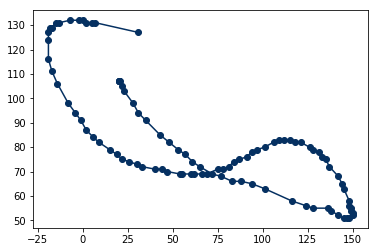


Movement for session started Mon Mar 6 16:54:40 2017


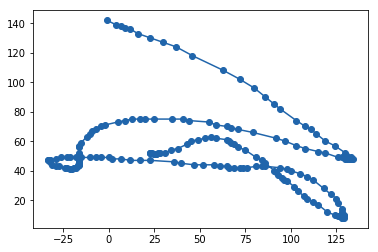


Movement for session started Mon Mar 6 17:05:54 2017


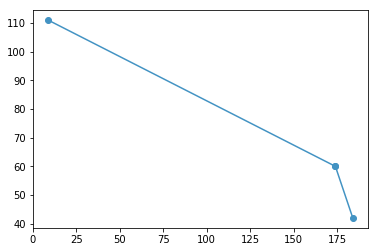


Movement for session started Mon Mar 6 17:20:55 2017


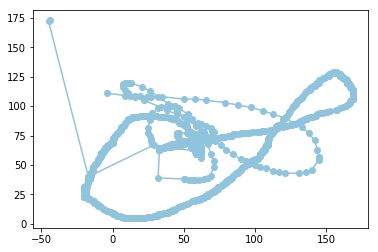


Movement for session started Tue Mar 7 16:52:26 2017


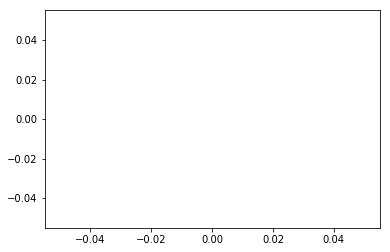


Movement for session started Wed Mar 8 09:22:49 2017


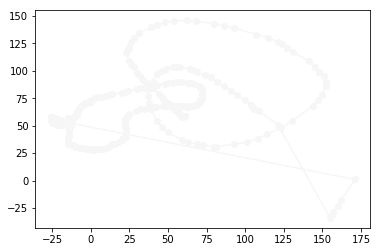


Movement for session started Wed Mar 8 15:54:38 2017


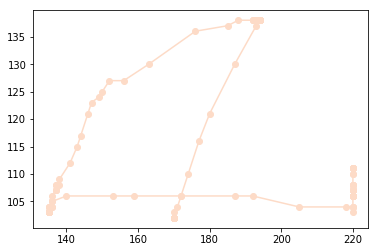


Movement for session started Wed Mar 8 15:57:38 2017


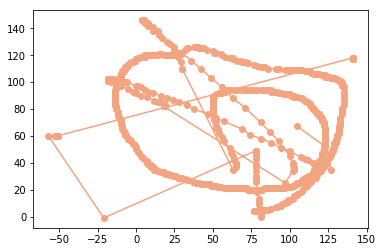


Movement for session started Mon Mar 13 13:13:57 2017


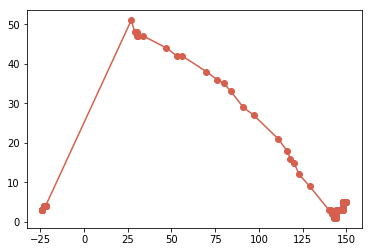


Movement for session started Tue Mar 14 17:26:39 2017


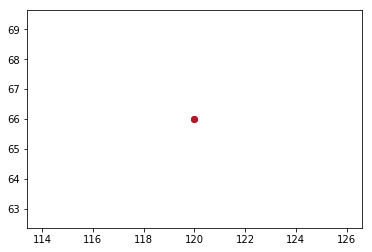


Movement for session started Wed Mar 15 11:05:51 2017


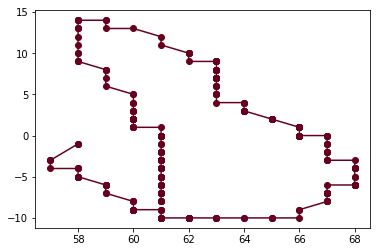


Movement for session started Mon Mar 20 10:16:17 2017


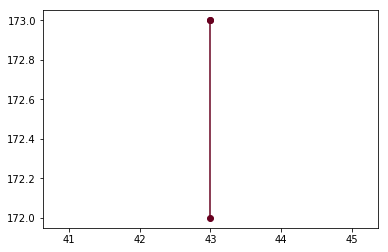


Movement for session started Tue Mar 21 09:29:18 2017


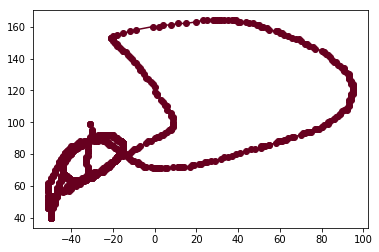


Movement for session started Mon Mar 27 20:23:29 2017


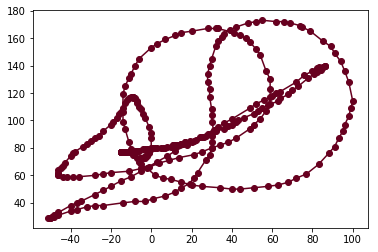


Movement for session started Tue Mar 28 09:09:29 2017


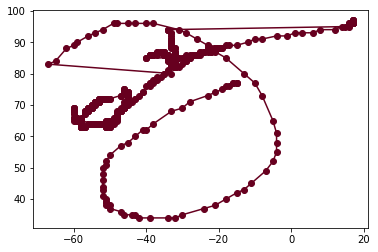

In [1444]:
cmap = plt.cm.RdBu_r
if filne.find('tablet') !=-1:
    for i in range(len(NewSession)):
        print('')
        print('Movement for session started', ' '.join(NewSession[i][1:]))
        
        plt.plot(*zip(*CoordListofLists[i]), marker='o', ls='-', color=cmap(i/10.0))
        
        plt.show()

In [1445]:
if filne.find('tablet') !=-1:
    print('')
    print('Number of new sessions:                ', len(NewSession))
    print('Times Light was switched ON:           ', LightONCount)
    print('Times Light was switched OFF:          ', LightOFFCount)


Number of new sessions:                 15
Times Light was switched ON:            0
Times Light was switched OFF:           0



Movement for session started Mon Mar 6 16:33:21 2017


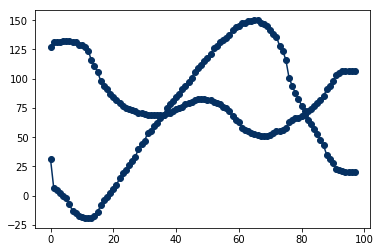


Movement for session started Mon Mar 6 16:54:40 2017


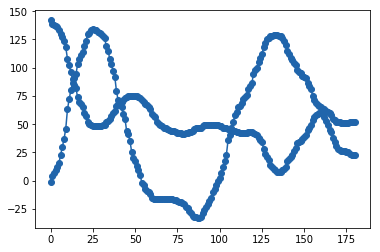


Movement for session started Mon Mar 6 17:05:54 2017


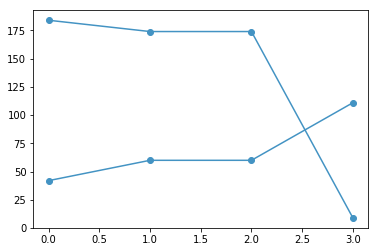


Movement for session started Mon Mar 6 17:20:55 2017


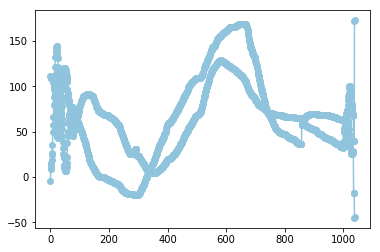


Movement for session started Tue Mar 7 16:52:26 2017


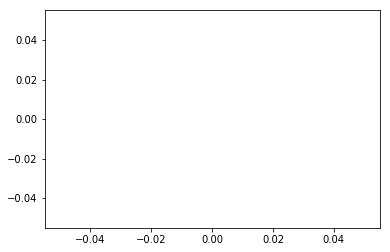


Movement for session started Wed Mar 8 09:22:49 2017


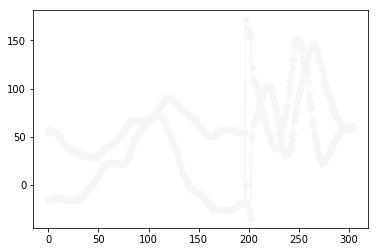


Movement for session started Wed Mar 8 15:54:38 2017


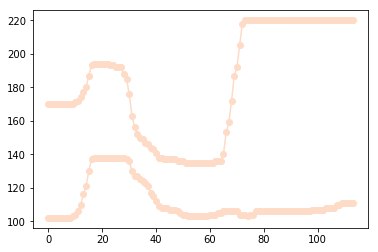


Movement for session started Wed Mar 8 15:57:38 2017


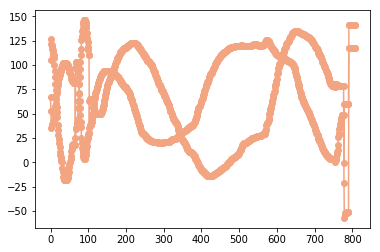


Movement for session started Mon Mar 13 13:13:57 2017


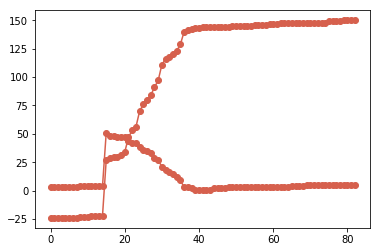


Movement for session started Tue Mar 14 17:26:39 2017


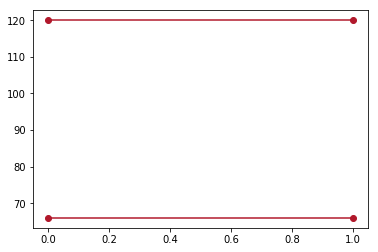


Movement for session started Wed Mar 15 11:05:51 2017


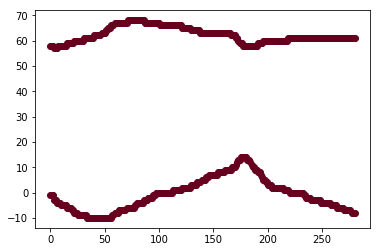


Movement for session started Mon Mar 20 10:16:17 2017


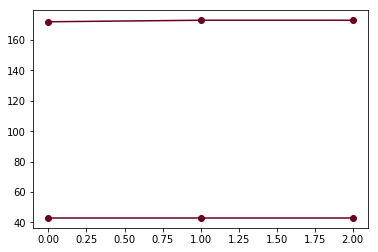


Movement for session started Tue Mar 21 09:29:18 2017


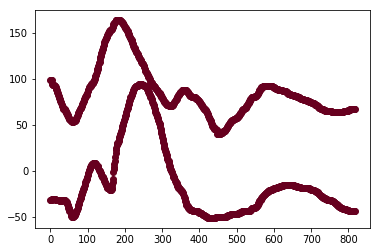


Movement for session started Mon Mar 27 20:23:29 2017


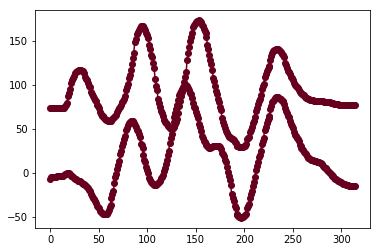


Movement for session started Tue Mar 28 09:09:29 2017


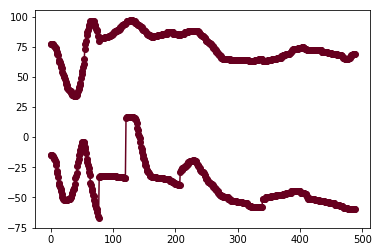

In [1447]:
cmap = plt.cm.RdBu_r
if filne.find('tablet') !=-1:
    for i in range(len(NewSession)):
        print('')
        print('Movement for session started', ' '.join(NewSession[i][1:]))
        
        plt.plot(CoordListofLists[i], marker='o', ls='-', color=cmap(i/10.0))
        
        plt.show()

In [1466]:
cmap = plt.cm.RdBu_r
plt.plot(*zip(*CoordListofLists[1]), color=cmap)
plt.show()

ValueError: Invalid RGBA argument: <matplotlib.colors.LinearSegmentedColormap object at 0x000002E4CF3DE518>